In [16]:
import cv2 as cv
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
 
def read_image(path, color_code=cv.IMREAD_GRAYSCALE):
    """
    read a picture from path
    :type path: string
    :param path: the location of a picture
    :type color_code: opencv color code
    :param color_code: which type the image should be read, cv.IMREAD_GRAYSCALE as default
    :return: the picture read from the path, None if there is an error
    """
    return cv.imread(path, color_code)
 
 
def convert_color_gray(image):
    """
    convert a bgr image to gray
    :type image: opencv image
    :param image: the image need to convert
    :return: an image in gray color
    """
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)
 
 
def resize_img(img, width=800):
    """
    resize image
    :type img: image
    :param img: input image
    :type width: int
    :param width: width after resize,800 as default
    :return: image after resize
    """
    return cv.resize(img, (width, int(width * img.shape[0] / img.shape[1])))
 
 
def convert_color(image, code=cv.COLOR_BGR2GRAY):
    """
    convert color space of an image
    :type image: image
    :param image: input image
    :type code: opencv convert code
    :param code: opencv color convert , COLOR_BGR2GRAY as default
    :return: image after convert
    """
    return cv.cvtColor(image, code)
 
 
def center_avg_imp(img, ksize=10, flag=True):
    """
    improve the image pixels by image center pixel average
    :type img: image
    :param img: the image need to be improved
    :type ksize: int
    :param ksize: the filter size, 10 as default
    :type flag: Boolean
    :param flag: show the result or not
    :return: the result after deal
    """
    new_img = np.copy(img)
 
    dw = int(img.shape[1] / 7)   # 获取原图像长宽的1/7
    dh = int(img.shape[0] / 7)
 
    # 选取图像中的5个区域
    region_1 = new_img[dh * 1: dh * 2, dw * 1: dw * 2]
    region_2 = new_img[dh * 1: dh * 2, dw * 5: dw * 6]
    region_3 = new_img[dh * 5: dh * 6, dw * 5: dw * 6]
    region_4 = new_img[dh * 1: dh * 2, dw * 5: dw * 6]
    region_5 = new_img[dh * 3: dh * 4, dw * 3: dw * 4]
 
    # 计算5个区域的均值
    avg1 = np.average(region_1)
    avg2 = np.average(region_2)
    avg3 = np.average(region_3)
    avg4 = np.average(region_4)
    avg5 = np.average(region_5)
 
    # 5个区域均值的均值
    avg = (avg1 + avg2 + avg3 + avg4 + avg5) / 5
 
    for x in range(0, img.shape[0], ksize):
        for y in range(0, img.shape[1], ksize):
            # 每次运算选取10*10的像素方块进行操作    *均值/方块均值
            new_img[x:x + ksize, y:y + ksize] = \
                img[x:x + ksize, y:y + ksize] * (avg / np.average(img[x:x + ksize, y:y + ksize]))
 
    # new_img = cv.medianBlur(img, 15)
    # 中值滤波（Median filter）是一种典型的非线性滤波技术，基本思想是用像素点邻域灰度值的中值来代替该像素点的灰度值
    # 2.ksize：核大小，必须是比1大的奇数【举个例子：3，5，7…】
 
    if flag:
        plt.subplot(2, 2, 1)
        plt.imshow(img, cmap='gray')
 
        plt.subplot(2, 2, 2)
        plt.imshow(new_img, cmap='gray')
 
        plt.subplot(2, 2, 4)
        plt.hist(new_img)
 
        plt.subplot(2, 2, 3)
        plt.hist(img)
 
        plt.show()
 
    return new_img
 
 
def equalize_hist(img, flag=True):
    """
    equalize hist to improve image
    :type img: image
    :param img: input image
    :type flag: Boolean
    :param flag: show the result if is True, False as default
    :return: the image after equalize hist
    """
    hist_img = np.zeros(shape=img.shape)
    hist_img = cv.equalizeHist(img, hist_img)
    if flag:
        plt.subplot(2, 2, 1)
        plt.imshow(img, cmap="gray")
        plt.title("Original Image")  # 原图
        plt.subplot(2, 2, 2)
        plt.hist(img)  #
        plt.title("Original Histogram")  # 原图直方图
        plt.subplot(2, 2, 3)
        plt.imshow(hist_img, cmap="gray")  #
        plt.title("Equalized Result")  # 均衡化结果
        plt.subplot(2, 2, 4)
        plt.hist(hist_img) #
        plt.title("Equalized Histogram")  # 均衡化结果直方图
        plt.show()
    return hist_img
 
 
def med_blur(img, ksize=3, flag=True):
    """
    Median filter for input image
    :param img: input image
    :param ksize: size of filter
    :return: image after median filter
    """
 
    if img.dtype is not np.uint8:
        img = img.astype(np.uint8)
 
    new_img = cv.medianBlur(img, ksize)
    if flag:
        plt.subplot(2, 2, 1)
        plt.imshow(img, cmap="gray")
        plt.title("Original Image")  # 原图
        plt.subplot(2, 2, 2)
        plt.hist(img)
        plt.title("Original Histogram")  # 原图直方图
        plt.subplot(2, 2, 3)
        plt.imshow(new_img, cmap="gray")
        plt.title("Median Filter Result")  # 中值滤波结果
        plt.subplot(2, 2, 4)
        plt.hist(new_img)
        plt.title("Median Filter Histogram")  # 中值滤波结果直方图
        plt.show()
    return new_img
 
 
def gauss_blur(img, ksize=[3, 3]):
    cv.GaussianBlur(img, ksize=ksize)
 
 
def adj_gamma(img, flag=True):
    """
    对图像进行归一化处理
    :param img: 输入图像
    :param flag: 是否显示归一化之后的图像
    :return: 归一化之后的图像
    """
    new_image = img
    new_image = new_image - np.min(np.min(new_image))
    new_image = new_image / np.max(np.max(new_image))
 
    if flag:
        x = np.arange(0, new_image.shape[1], 1)
        y = np.arange(0, new_image.shape[0], 1)
        xg, yg = np.meshgrid(x, y)
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.plot_surface(xg, yg, new_image, rstride=1, cstride=1, cmap=cm.viridis)
        plt.show()
 
    return new_image
 
 
def binary_image(img, thresh=0.15, flag=True):
    """
    对图形进行二值化
    :param img: 输入图形
    :param thresh: 阈值
    :param flag: 是否显示结果
    :return: 二值化之后的图形
    """
    t = np.reshape(img, img.shape[1] * img.shape[0])
    pixel = np.bincount(t)
    xdata = np.linspace(1, pixel.shape[0], pixel.shape[0])
    index = np.argwhere(pixel == np.max(pixel))
    thresh = index[0][0] / 3
    plt.plot(pixel)
    plt.show()
 
    ret, new_img = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)
    new_img = np.abs(new_img - 255)
    if flag:
        plt.subplot(2, 1, 1)
        plt.imshow(img, cmap="gray")
        plt.subplot(2, 1, 2)
        plt.imshow(new_img, cmap="gray")
        plt.show()
    return new_img
 
 
def hist_segmentation(img):
    """
    do image segmentation using hist
    :type img: gray image
    :param img: origin image
    :return: image after segmentation
    """
    hist = cv.calcHist([img], [0], None, [256], [0, 255])
    max_index = np.where(hist == max(hist))
    mask = hist[0:max_index[0][0]]
    min_index = np.where(mask == min(mask))
    ret, new_im = cv.threshold(img, min_index[0][0], 255, cv.THRESH_BINARY)
    return new_im

In [17]:
import math
 
 
def distance_calc(point1, point2):
    """
    to calculate the distance of 2 points
    :param point1: pt1
    :param point2: pt2
    :return: the distance
    """
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)
 
 
def min_distace(pointlist, center):
    """
    given a group of points and a center point to find out the point which is closest to center point
    :type pointlist: tuple
    :param pointlist: the list of point
    :type center: tuple
    :param center: center point
    :return: the point closest to center
    """
    dis_dict = dict()
    dis_list = []
 
    # for all the point calculate distance
    for index in range(len(pointlist[0])):
        pt = (pointlist[0][index], pointlist[1][index])
        dis = distance_calc(pt, center)
        dis_dict[dis] = pt    # 距离：pointlist坐标
        dis_list.append(dis)
    dis_list.sort()
    return dis_dict[dis_list[0]]   # 在pointlist中找距离center最近的坐标

In [18]:
"""
to do image segmentation using region grow method
"""
import numpy as np
import cv2
 
class RegionGrow:
    def __init__(self, image):
        """
        init class
        :param image: the image need to process
        """
        self.image = image
        self.imlist = []
        self.poslist = []
        self.retimg = np.zeros(shape=self.image.shape)
        self.imh, self.imw = image.shape
        self.block_w = 0
        self.block_h = 0
 
    def region_grow(self, mode=8):
        """
        image segmentation using region grow
        :type img: image
        :param img: input image
        :type mode: int
        :param mode: 4 or 8 only(8 as default)
        :return: new image after segmentation
        """
        for x in range(9):
            point = self.poslist[x]
            timblock = np.zeros(shape=self.image.shape)
            if point is None:
                print("原图没有黑点！")
                continue
            # the position of the seed
            start_point = (point[0], point[1])   # 从距离中心点最近的黑像素点开始
            # print("retimg:",np.where(self.retimg > 0))
            cv2.imshow("11 ",self.retimg)
            cv2.waitKey()
            if self.retimg[start_point[0], start_point[1]] != 0:
                # 如果此点的像素不为0：证明已经被延伸到了
                print("已经被延伸到了！")
                continue
            # the stack of point which need to be visited
            point_list = [start_point]
            print("point_list:",point_list)
            # the dict of visited point
            visited_point = dict()
            visited_point[start_point] = start_point
            print("visited_point : ",visited_point)
            while len(point_list) > 0:
                # pop the top point and grow around this point
                point = point_list.pop()
                # 延伸！！！！
                for i in range(-1, 2):
                    for j in range(-1, 2):
                        # the point that is going to grow
                        new_point = point[0] + i, point[1] + j
                        # is the point visited, if visited pass the point
                        # print("延伸后的点：",new_point)
                        if visited_point.get(new_point) is not None:
                            continue
                        try:
                            # 如果延伸点在图像范围内、两个点的灰度值相差在40之内：在t imblock将此点赋为255、并将此点放入p oint_list， v isited_point[new_point] = new_point
                            if 0 <= new_point[0] < self.imh and 0 <= new_point[1] < self.imw and np.abs(
                                    int(self.image[new_point[0], new_point[1]]) -
                                    int(self.image[start_point[0], start_point[1]])) < 40:
                                timblock[new_point[0], new_point[1]] = 255
                                point_list.append(new_point)
                                visited_point[new_point] = new_point
                        except:
                            print(new_point)
                # print("point_list:",point_list)
            self.im_merge2(timblock)  #  timblock, self.retimg相加赋给self.retimg
        self.retimg = self.retimg != 0
        # cv2.imshow("retimg",self.retimg)  打印不出来
        return self.retimg
 
 
    def img_cut(self):
        """
        cut the image into 9 parts
        :return: list of image
        """
        # determine the size of pre block
        self.block_w = int(self.imw / 3)
        self.block_h = int(self.imh / 3)
        for i in range(3):
            for j in range(3):
                # 以3*3小矩形进行遍历
                self.imlist.append(self.image[i * self.block_h:(i + 1) * self.block_h,
                                   j * self.block_w:(j + 1) * self.block_w])
        #返回矩阵列表len= 9
        return self.imlist
 
 
    def min_pos(self):
        """
        to find out the darkness point in each block
        :return: a list of position in each block
        """
        min_val = np.min(np.min(self.image))
        print("min_val",min_val)  # 0
        block_index = 0
        # 遍历小矩阵列表 (200, 266)
        for block in self.imlist:
            block = np.floor(block / 4)    # 对输入的多维数组逐元素进行向下取整：变暗
            block = block.astype(np.uint8)   # 转化为图像数据0-255
            posarr = np.where(block == min_val)  #
            # check is is this block contains min value
            # 如果没找到就继续，从下一个小方块找
            if len(posarr[0]) <= 0:
                self.poslist.append(None)
                block_index += 1
                continue
            # todo using a more useful method to chose the seed
            # No.1 chose the point which is closest to center point
            # pick a point randomly and convert to global position
            center = (int(self.block_h / 2), int(self.block_w / 2))  # center point
            pt = min_distace(posarr, center)  # 在posarr中找距离center最近的坐标
            posw = int(block_index % 3) * self.block_w + pt[1]
            posh = int(block_index / 3) * self.block_h + pt[0]
            # posw，posh为 posarr_min 在大图中的绝对坐标
            self.poslist.append((posh, posw))
            block_index += 1
        print("min_pos : ",self.poslist)
        return self.poslist
 
    def im_merge2(self, temp_img):
        self.retimg = np.add(temp_img, self.retimg)
        print('im_merge2:',temp_img)
        cv2.imshow("im_merge2",temp_img)
        cv2.waitKey()
 

In [19]:
'''
# coding:utf-8
import time
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
 
def morphological_operations(image):
    # 形態學操作
    #kernel = np.ones((5, 5), np.uint8)
    #closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    fat_image = cv.dilate(image, None, iterations=1)
    return fat_image
'''

'\n# coding:utf-8\nimport time\nimport cv2 as cv\nfrom matplotlib import pyplot as plt\nimport numpy as np\n \ndef morphological_operations(image):\n    # 形態學操作\n    #kernel = np.ones((5, 5), np.uint8)\n    #closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)\n    fat_image = cv.dilate(image, None, iterations=1)\n    return fat_image\n'

In [20]:
'''
# 读取图片
origin = read_image("/home/yuchi/Canny_Detection/crackforest/Images/001.jpg", color_code=cv.IMREAD_ANYCOLOR)   # 彩色图片
print("1.读取图片")
plt.imshow(origin)  # 在圖表中繪製圖片
plt.show() # 顯示圖表
'''

'\n# 读取图片\norigin = read_image("/home/yuchi/Canny_Detection/crackforest/Images/001.jpg", color_code=cv.IMREAD_ANYCOLOR)   # 彩色图片\nprint("1.读取图片")\nplt.imshow(origin)  # 在圖表中繪製圖片\nplt.show() # 顯示圖表\n'

In [21]:
'''
# 裁剪图片
origin = resize_img(origin)
# 彩色图片->灰度图
img = convert_color(origin)
'''

'\n# 裁剪图片\norigin = resize_img(origin)\n# 彩色图片->灰度图\nimg = convert_color(origin)\n'

In [22]:
'''
img = equalize_hist(img, flag=True)   # 均值化
print("2.均值化")
plt.imshow(img)  # 在圖表中繪製圖片
plt.show() # 顯示圖表
'''

'\nimg = equalize_hist(img, flag=True)   # 均值化\nprint("2.均值化")\nplt.imshow(img)  # 在圖表中繪製圖片\nplt.show() # 顯示圖表\n'

In [23]:
'''
img = center_avg_imp(img, ksize=20, flag=True)
print("3.中心均值")
plt.imshow(img)  # 在圖表中繪製圖片
plt.show() # 顯示圖表
img = med_blur(img, ksize=5, flag=True)
'''

'\nimg = center_avg_imp(img, ksize=20, flag=True)\nprint("3.中心均值")\nplt.imshow(img)  # 在圖表中繪製圖片\nplt.show() # 顯示圖表\nimg = med_blur(img, ksize=5, flag=True)\n'

In [24]:
'''
rg = RegionGrow(img)
rg.img_cut()
rg.min_pos()
img = rg.region_grow()  # 衍生！！
# img = rg.im_merge()
print("4.区域生长")
plt.imshow(img, cmap="gray")
plt.show()
'''

'\nrg = RegionGrow(img)\nrg.img_cut()\nrg.min_pos()\nimg = rg.region_grow()  # 衍生！！\n# img = rg.im_merge()\nprint("4.区域生长")\nplt.imshow(img, cmap="gray")\nplt.show()\n'

In [25]:
'''
img = med_blur(img, ksize=3, flag=True)   # 中值滤波

img = morphological_operations(img)
print("5.形态学操作")
plt.imshow(img, cmap="gray")
plt.show()
'''

'\nimg = med_blur(img, ksize=3, flag=True)   # 中值滤波\n\nimg = morphological_operations(img)\nprint("5.形态学操作")\nplt.imshow(img, cmap="gray")\nplt.show()\n'

In [26]:
# coding:utf-8
import time
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
import os
import numpy as np
from skimage.color import rgb2hsv
from skimage import filters

def enhance_contrast(image):
    # 對比增強
    return cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

def rgb_to_hsv(image):
    # RGB轉HSI/HSV
    hsv_image = rgb2hsv(image)
    intensity = hsv_image[2:, :,2 ]  # 提取亮度通道
    return intensity

def calculate_otsu_threshold(image):
    # 計算 Otsu 閾值
    return filters.threshold_otsu(image)

def apply_joint_threshold(image, otsu_thresh):
    # 計算聯合閾值
    _, binary_global = cv2.threshold(image, otsu_thresh, 255, cv2.THRESH_BINARY)
    return binary_global

def canny_edge_detection(image):
    # Canny 邊緣檢測
    return cv2.Canny(image, 100, 200)

def morphological_operations(image):
    # 形態學操作
    #kernel = np.ones((5, 5), np.uint8)
    #closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    fat_image = cv.dilate(image, None, iterations=2)
    return fat_image


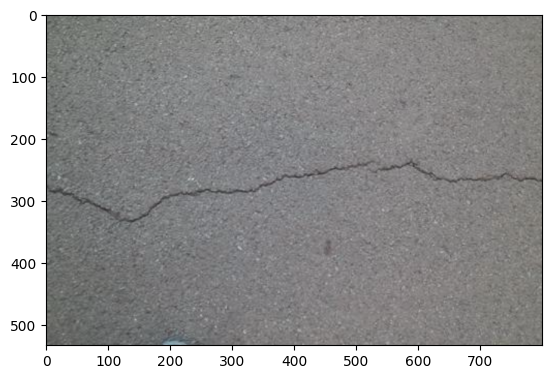

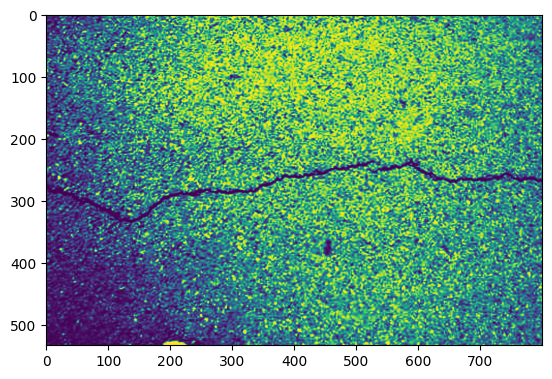

In [27]:
# 读取图片
origin = read_image("/home/yuchi/Canny_Detection/crackforest/Images/001.jpg", color_code=cv.IMREAD_ANYCOLOR)  # Read color image  
# 裁剪图片
img = resize_img(origin)
plt.imshow(img)  # 在圖表中繪製圖片
plt.show() # 顯示圖表   
# 步驟 1: 對比增強
enhanced_image = enhance_contrast(img)
plt.imshow(enhanced_image)  # 在圖表中繪製圖片
plt.show() # 顯示圖表

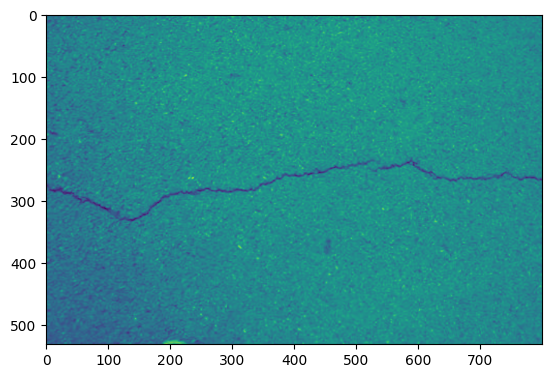

In [28]:
# 步驟 2: RGB 轉 HSI/HSV
intensity = rgb_to_hsv(img)
plt.imshow(intensity)  # 在圖表中繪製圖片
plt.show() # 顯示圖表

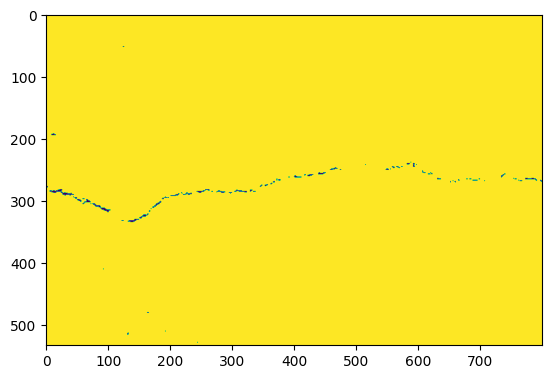

In [29]:
# 步驟 3: 計算 Otsu 閾值
otsu_thresh = calculate_otsu_threshold(intensity)

joint_thresholded = apply_joint_threshold(enhanced_image, otsu_thresh)
plt.imshow(joint_thresholded)  # 在圖表中繪製圖片
plt.show() # 顯示圖表

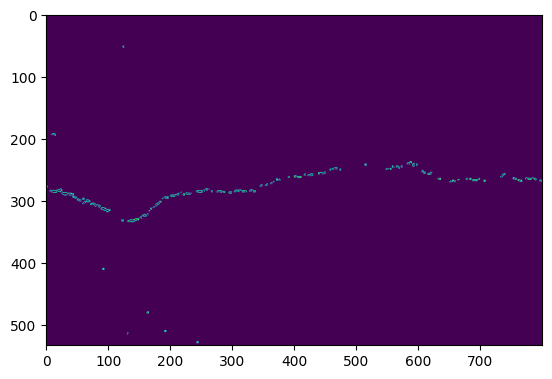

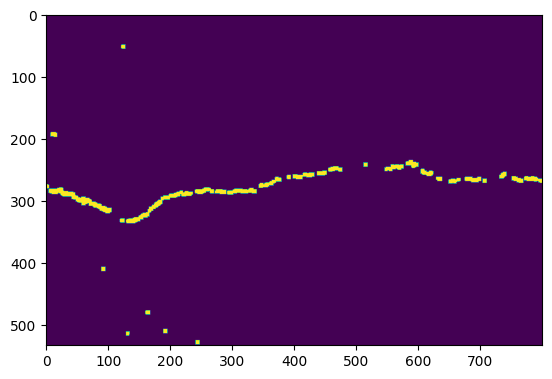

In [30]:
# 步驟 5: Canny 邊緣檢測
edges = canny_edge_detection(joint_thresholded)
plt.imshow(edges)  # 在圖表中繪製圖片
plt.show() # 顯示圖表
# 步驟 6: 形態學操作
final_image = morphological_operations(edges)
plt.imshow(final_image)  # 在圖表中繪製圖片
plt.show() # 顯示圖表